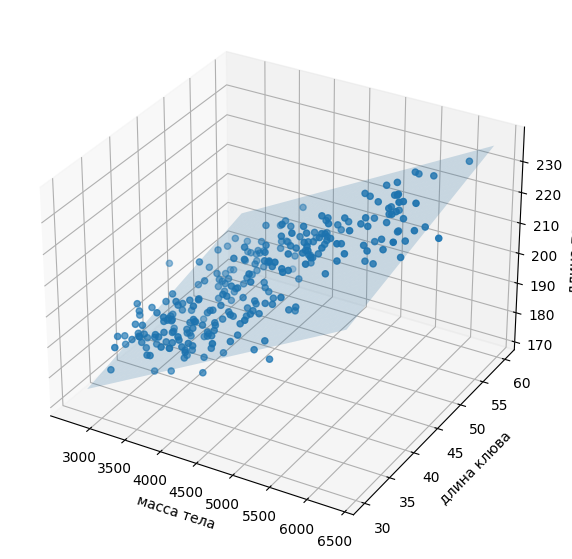

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # В модуле находятся все линейные модели
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

data = pd.read_csv('penguins.csv') 
X = data[['масса тела', 'длина клюва']] # Двойные скобки для того, чтобы Х представлялся как таблица, а не как массив, так как модель для обучения принимает Х в форме таблицы
y = data['длина плавника']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
lr = LinearRegression() # Заводим модель линейной регресии
lr.fit(X_train, y_train) #lr.coef_ коэффициент признака, lr.intercept_ свободный член
y_train_predicted = lr.predict(X_train)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train
ax.scatter(x_points, y_points, z_points)
f_plane = lambda x1, x2: lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_
x, y = np.meshgrid(range(2800, 6350), range(30, 61))
z = np.array([f_plane(point_x, point_y) for point_x, point_y in zip(x, y)])
ax.plot_surface(x, y, z, alpha=0.2)
ax.set_xlabel('масса тела')
ax.set_ylabel('длина клюва')
ax.set_zlabel('длина плавника')
plt.show()

